In [ ]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


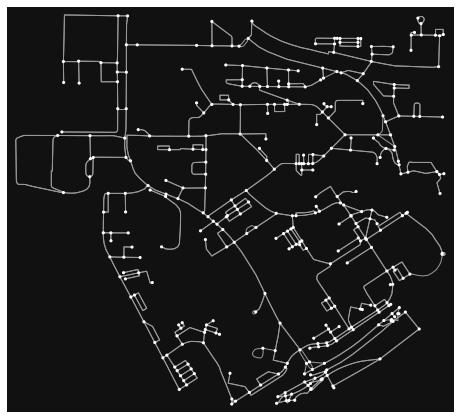

In [ ]:
import pandas as pd
import numpy as np
import csv
import random
NUM_REQUEST = 20 
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__
kaist = (36.3709,127.3613)

G = ox.graph_from_point(kaist, dist=750, network_type = "bike")
fig, ax = ox.plot_graph(G, node_size=10)

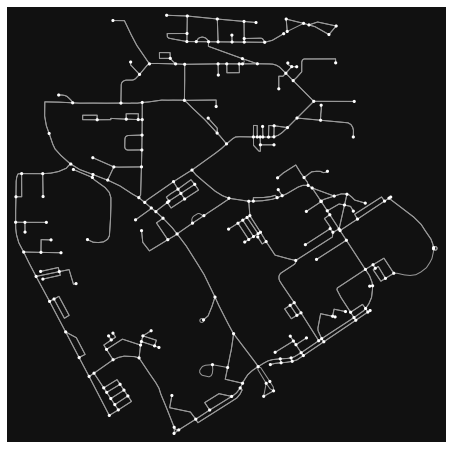

In [ ]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# print(gdf_nodes)
new_gdf = gdf_nodes
new_gdf1 = new_gdf[-0.5157593123218502 * new_gdf.x + new_gdf.y < -29.323675157711996]
G_new = G
for i in new_gdf1.index:
    try:
        G_new.remove_node(i)
    except:
        pass
   
new_gdf2 = new_gdf[-0.6590909090895878* new_gdf.x + new_gdf.y < -47.579106363468064]

for i in new_gdf2.index:
    try:
        G_new.remove_node(i)
    except:
        pass

new_gdf = gdf_nodes[gdf_nodes.x < 127.3564 ]
new_gdf = new_gdf[new_gdf.y > 36.37165]

for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass
    
new_gdf = gdf_nodes[gdf_nodes.y > 36.37588]
new_gdf
for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass
    
new_gdf = gdf_nodes
new_gdf2 = new_gdf[2.297872340464131* new_gdf.x + new_gdf.y > 329.0468246857673]
new_gdf2 = new_gdf2[new_gdf2.y > 36.37037]
for i in new_gdf2.index:
    try:
        G_new.remove_node(i)
    except:
        pass

new_gdf = gdf_nodes
new_gdf = new_gdf[new_gdf.y >36.37266]
new_gdf = new_gdf[new_gdf.y <36.37304]
new_gdf = new_gdf[new_gdf.x >127.36686]
new_gdf = new_gdf[new_gdf.x <127.36720]
for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass

G_new.remove_node(10093887420)    
fig, ax = ox.plot_graph(G_new, node_size=10)

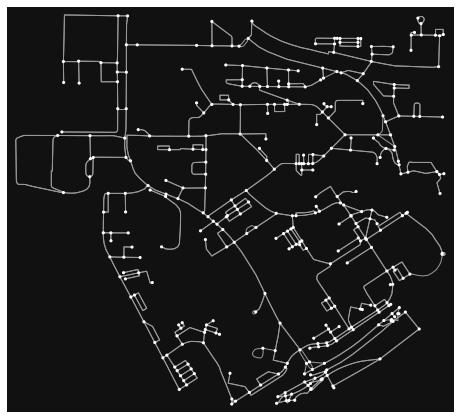

In [ ]:
kaist = (36.3709,127.3613)

G = ox.graph_from_point(kaist, dist=750, network_type = "bike")
fig, ax = ox.plot_graph(G, node_size=10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

nodd = list()
f = open('/content/drive/MyDrive/E-Scooter/for_test/kaist_node.csv','r')
n = csv.reader(f)
for row in n:
    nodd.append(row)
node = np.array(nodd[1:])

Node=node[:,0]
Node_yx = node[:,1:3]
Node_yx = Node_yx.astype(np.float)
Node_road_count = node[:,3]
f.close


<ipython-input-268-7a28c3f5e408>:10: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<function TextIOWrapper.close()>

In [ ]:
Node

array(['277875336', '317557475', '317557510', '317557514', '317557515',
       '317557516', '317557519', '317557534', '317557535', '317557538',
       '317557612', '317557615', '317557616', '317557623', '317557625',
       '317557633', '317557634', '317557637', '317557642', '317557648',
       '317557651', '317557652', '317557655', '317557656', '317557670',
       '317557673', '352963031', '352963156', '352963165', '352963182',
       '352963189', '352963217', '352963275', '352963317', '352963331',
       '352963401', '910330593', '910330595', '917104038', '917104049',
       '917104096', '2060630060', '2074603279', '2204213101',
       '2290285064', '2292328365', '2292328367', '2292329732',
       '2292329733', '2292330391', '2292330392', '2292331317',
       '2292331321', '2292335706', '2292336709', '2292336712',
       '2292338854', '2292338857', '2292342537', '2292342538',
       '2292342539', '2292342540', '2292342541', '2292342978',
       '2292342979', '2292342980', '2292345422'

In [ ]:
osmid1 = '277875336'
start_idx = np.where(Node == osmid1)
print(start_idx)

(array([0]),)


In [ ]:

# ! kaist_edge.csv했을 때 name이 깨진다. 
nodd = list()
ff = open('/content/drive/MyDrive/E-Scooter/for_test/kaist_edge.csv','r',encoding='utf-8')
n = csv.reader(ff)
for row in n:
    nodd.append(row)
edge = np.array(nodd[1:])
# u,v,key,osmid,
# name,highway,oneway,
# reversed,length,lanes,
# geometry,maxspeed,access,
# service,bridge,junction
edge_u = edge[:,0]
edge_v = edge[:,1]
edge_len = edge[:,8]
edge_len = [float(s) for s in edge_len]
f.close

<function TextIOWrapper.close()>

In [ ]:
edge_u

array(['277875336', '277875336', '317557475', '317557475', '317557510',
       '317557510', '317557510', '317557514', '317557514', '317557514',
       '317557515', '317557515', '317557515', '317557516', '317557516',
       '317557516', '317557519', '317557519', '317557519', '317557534',
       '317557534', '317557534', '317557535', '317557535', '317557535',
       '317557535', '317557538', '317557538', '317557538', '317557612',
       '317557612', '317557612', '317557615', '317557615', '317557615',
       '317557616', '317557616', '317557616', '317557623', '317557623',
       '317557623', '317557625', '317557625', '317557625', '317557633',
       '317557633', '317557633', '317557633', '317557634', '317557634',
       '317557634', '317557634', '317557637', '317557637', '317557637',
       '317557642', '317557642', '317557642', '317557642', '317557648',
       '317557648', '317557648', '317557648', '317557651', '317557651',
       '317557651', '317557652', '317557652', '317557652', '3175

In [ ]:
edge_u[400]

'2294291321'

In [ ]:
def random_dates(start, end, n):
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.DatetimeIndex((10**9*np.random.randint(start_u, end_u, n, dtype=np.int64)).view('M8[ns]'))

In [ ]:
t_start = pd.to_datetime('2022-11-30')
t_end = pd.to_datetime('2022-12-01')
request = random_dates(t_start, t_end, NUM_REQUEST)

df_request = pd.DataFrame({})
df_request['Time'] = pd.DataFrame(request.sort_values())
df_request

,Time
0,2022-11-30 00:52:26
1,2022-11-30 06:14:14
2,2022-11-30 07:01:54
3,2022-11-30 07:24:52
4,2022-11-30 08:27:46
5,2022-11-30 08:45:32
6,2022-11-30 08:58:58
7,2022-11-30 09:08:57
8,2022-11-30 10:00:21
9,2022-11-30 10:16:39


### 고민해야할 것, Request 는 각 node에? 각 edge위에? 임의의 point에?

In [ ]:
# 예1
df_request_with_node = df_request.copy()
df_request_with_node['startnode'] = pd.DataFrame(['node'+str(random.randint(0,250)) for _ in range(NUM_REQUEST)])
df_request_with_node['endnode'] = pd.DataFrame(['node'+str(random.randint(0,250)) for _ in range(NUM_REQUEST)])
df_request_with_node

,Time,startnode,endnode
0,2022-11-30 00:52:26,node8,node95
1,2022-11-30 06:14:14,node118,node210
2,2022-11-30 07:01:54,node101,node158
3,2022-11-30 07:24:52,node141,node219
4,2022-11-30 08:27:46,node221,node39
5,2022-11-30 08:45:32,node12,node168
6,2022-11-30 08:58:58,node160,node112
7,2022-11-30 09:08:57,node49,node154
8,2022-11-30 10:00:21,node141,node75
9,2022-11-30 10:16:39,node97,node174


Request : each edge 위에

In [ ]:
# 예2)
df_request_with_edge = df_request.copy()
df_request_with_edge['startedge'] = pd.DataFrame(['edge'+str(random.randint(0,621)) for _ in range(NUM_REQUEST)])
df_request_with_edge['startpart'] = pd.DataFrame(['%0.1f'%random.random() for _ in range(NUM_REQUEST)])
df_request_with_edge['endedge'] = pd.DataFrame(['edge'+str(random.randint(0,621)) for _ in range(NUM_REQUEST)])
df_request_with_edge['endpart'] = pd.DataFrame(['%0.1f'%random.random() for _ in range(NUM_REQUEST)])
df_request_with_edge

,Time,startedge,startpart,endedge,endpart
0,2022-11-30 00:52:26,edge37,0.6,edge536,0.2
1,2022-11-30 06:14:14,edge171,0.2,edge235,0.6
2,2022-11-30 07:01:54,edge494,0.0,edge530,1.0
3,2022-11-30 07:24:52,edge161,0.1,edge576,0.4
4,2022-11-30 08:27:46,edge95,0.5,edge201,0.9
5,2022-11-30 08:45:32,edge204,1.0,edge257,0.8
6,2022-11-30 08:58:58,edge483,0.5,edge574,0.8
7,2022-11-30 09:08:57,edge30,0.2,edge398,0.6
8,2022-11-30 10:00:21,edge570,0.9,edge123,0.3
9,2022-11-30 10:16:39,edge101,0.5,edge193,0.6


In [ ]:
df_request_with_edge['startedge'][0]

'edge37'

In [ ]:
a = 'abcd123'
print(a[4:])
print(int(a[4:]))

123
123


### 이와 같이 request 에 필요한 데이터를 고민해서, 추가할 필요. 우선은 위치만 결정하고 거리로 점수 정해서 풀어보고, 추가적으로 확장

일단 필요한게 수요 예측
그리고 수요예측과 거리에 따른 reward.

In [ ]:
# LIST 1. 수요 예측하는 list 만들기
# 전체 스쿠터 댓수를 유지하면서
# 전체 edge 갯수 = 250
# Scoopter number is 100
# STATIONS = 9
NUM_REQUEST = 20
N = 100 
STATIONS = 9
Dem = []
Demand = []
for i in range(NUM_REQUEST):
    for j in range(STATIONS):
        demands = N * np.random.default_rng().dirichlet(np.ones(STATIONS),size=1)
        demands = [np.round(v) for v in demands]
        Dem.append(demands)
    Dem_ = np.asarray(Dem).reshape(-1,STATIONS)
    Dem = []
    Demand.append(Dem_)
Demand = np.array(Demand)
# 시간대에 따른 수요 <- 재배치에 쓰일 예정
print(Demand[2])

[[ 7. 19.  2.  1. 12. 22. 11. 20.  6.]
 [11.  7. 17.  1. 21. 12.  5. 20.  6.]
 [ 9.  9. 16.  6. 11. 11.  3. 25. 10.]
 [17.  4. 35. 17. 14.  1.  3.  3.  7.]
 [ 2.  3. 27.  3. 14. 15. 34.  3.  0.]
 [21. 13.  1. 14.  5. 13. 11. 11. 12.]
 [21.  8.  1. 15. 28.  6.  0. 16.  4.]
 [ 6. 14.  2. 12. 32. 21. 10.  2.  1.]
 [ 2. 17. 36.  8. 28.  1.  0.  6.  3.]]


In [ ]:
Gmpa_KAIST = ox.load_graphml('Final_KAIST.graphml')

In [ ]:
gdf_nodes,gdf_edges = ox.graph_to_gdfs(Gmpa_KAIST)

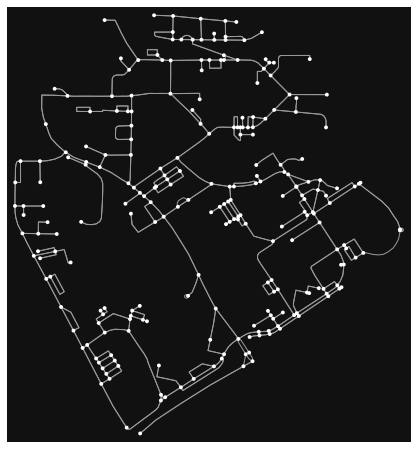

In [ ]:
fig,ax = ox.plot_graph(Gmpa_KAIST)

In [ ]:
import matplotlib.pyplot as plt

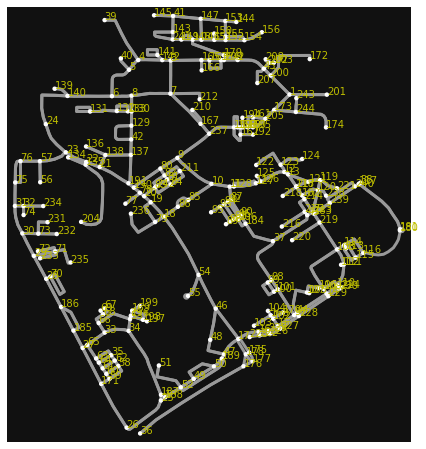

In [ ]:
fig, ax = ox.plot_graph(Gmpa_KAIST, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
for i in range(len(node)):
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()


In [ ]:
import plotly.graph_objects as go
import copy

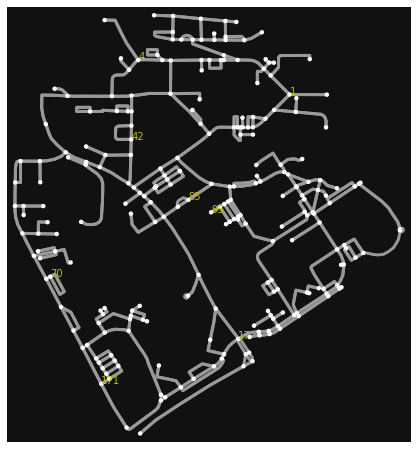

In [ ]:
'''
2. Station 지정해주기 <- special node일 뿐
일단 8개로 결정. 창의관, 기계동, 정문, N1, 희망관, 쪽문, 신뢰관, 도서관
Station : staion들의 정보를 모아둔 것.
'''
'''
창의관(85), 기계공학동(42), 정문(17), N1(1), 희망관(70), 쪽문(171), 신뢰관(4) - 기혼자숙소앞으로 변경
도서관(95)

'''
fig, ax = ox.plot_graph(Gmpa_KAIST, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
for i in [84,41,16,0,69,170,3,94]:
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()

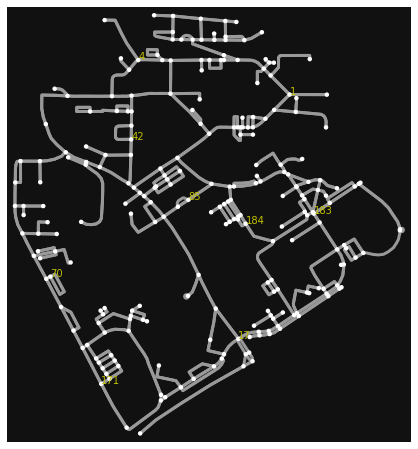

In [ ]:
'''
동측 하나가 부족한거같아서 183 추가
도서관(95) 가 좀 애매해서, 자연과학동으로 변경 184
'''

fig, ax = ox.plot_graph(Gmpa_KAIST, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
for i in [84,41,16,0,69,170,3,182,183]: # 참고로 id 랑 index 랑 1 차이남
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()

In [ ]:
mpa_KAIST = ox.load_graphml('/content/drive/MyDrive/E-Scooter/for_test/Final_KAIST.graphml')
gdf_nodes,gdf_edges = ox.graph_to_gdfs(Gmpa_KAIST)
fig = go.Figure(data=go.Scattergeo(
    lon=gdf_nodes['x'],
    lat=gdf_nodes['y'],
    mode='markers',
    marker_color='rgb(255, 255, 255)',
))

for edgeidx in range(len(gdf_edges)):
    linestrings = gdf_edges['geometry'].iloc[edgeidx]
    x, y = linestrings.xy
    lats_data = y
    lons_data = x

    for i in range(len(lats_data) - 1):
        fig.add_trace(go.Scattergeo(lon=[lons_data[i], lons_data[i + 1]], lat=[lats_data[i], lats_data[i + 1]],
                                    mode='lines', line=dict(width=2, color='white'), ))


fig.update_geos(lataxis_range=[36.3619, 36.3773], lonaxis_range=[127.3537, 127.3708])
fig.update_layout(showlegend=False, margin ={'t':0, 'r':0, 'b':0, 'l':0 }, plot_bgcolor = 'black', paper_bgcolor = 'black', geo = dict(landcolor = 'black'))


In [ ]:
# station plot
newfig = copy.deepcopy(fig)
node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
lon_data = node['x'].values[[84,41,16,0,69,170,3,182,183]]
lat_data = node['y'].values[[84,41,16,0,69,170,3,182,183]]
lon_exam = node['x'].values[[5,10]]
lat_exam = node['y'].values[[5,10]]
newfig.add_trace(go.Scattergeo(lon=lon_data,lat=lat_data,mode='markers',marker_color='rgb(0, 255, 0)'))
#newfig.add_trace(go.Scattergeo(lon=lon_exam,lat = lat_exam,mode='lines',marker_color='rgb(255, 0, 0)'))

In [ ]:
idx_stations = [84,41,16,0,69,170,3,182,183]
stations = Node[idx_stations]
stations_yx = Node_yx[idx_stations]


In [ ]:
stations

array(['2293534883', '2060630060', '317557634', '277875336', '2292346336',
       '2331416740', '317557514', '4627973436', '4627982679'],
      dtype='<U30')

In [ ]:
from haversine import haversine, Unit
# osmid1 , osmid2 <- should be string input.
def distances(osmid1,osmid2):
    # osmid1 : start node
    # osmid2 : destination node
    start_idx = np.where(Node == osmid1)
    start_yx = Node_yx[start_idx[0][0]]
    start_yx = list(map(float,start_yx))
    end_idx = np.where(Node == osmid2)
    end_yx = Node_yx[end_idx[0][0]]
    end_yx = list(map(float,end_yx))
    distance = haversine(start_yx, end_yx, unit = 'm')
    return distance

In [ ]:
distances('277875336','277875336')

0.0

In [ ]:
alpha = df_request_with_edge['endpart']
alpha[0]

'0.2'

In [ ]:
edge_len[527]

32.134

In [ ]:
float(alpha[0]) * edge_len[527]

6.4268

In [ ]:
stations[5]

'2331416740'

In [ ]:
Demand[0][1][2]

6.0

이거는 현재 vehicles의 분포를 알려주는 것. (Random하게 시작합니다.)

In [ ]:
curr_vehicles = N * np.random.default_rng().dirichlet(np.ones(STATIONS),size=1)
curr_vehicles = [np.round(v) for v in curr_vehicles]

In [ ]:
curr_vehicles

[array([ 7., 16.,  3., 13.,  2.,  8., 45.,  0.,  6.])]

In [ ]:
Demand[0][1][:]

array([ 7., 14.,  6., 29., 10., 18.,  8.,  0.,  7.])

In [ ]:
[1000]*9

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [ ]:
curr = N * np.random.default_rng().dirichlet(np.ones(STATIONS),size=1)
curr_ = [np.round(v) for v in curr]

In [ ]:
curr_[0][1]

1.0

In [ ]:
# Input : i , start node, j , stations[i] k, time. Output : rewards <- list
def Reward(des,k):
  rewards_from_des = []
  curr_= N * np.random.default_rng().dirichlet(np.ones(STATIONS),size=1)
  curr_vehicles = [np.round(v) for v in curr]
  # des_idx -> other stations 
  for j in range(STATIONS):
    if (Demand[k][des][j] - curr_vehicles[0][j]) == 1:
        rewards_from_des.append(1200.0)
    elif (Demand[k][des][j] - curr_vehicles[0][j]) > 0:
        rewards_from_des.append(1100.0)
    else:
        rewards_from_des.append(1000.0)
  return rewards_from_des
  

In [ ]:
print(idx)

630


In [ ]:
len(edge)

621

Finding the nearest station
1. END edge 확인
2. END edge에 해당하는 시작 node와 끝 node를 추출.
3. 시작 node에 가장 가까운 station 찾기, 끝 node에 가장 가까운 station 찾기 <- cost 함수 쓰기
4. 시작 node에서 가장 가까운 staiton 까지의 거리 + alpha * length VS 끝 node에서 가장 가까운 staiton 까지의 거리 + (1-alpha)* length
5. 거기에 수요 기반 Benefit도 더함

In [ ]:
alpha = df_request_with_edge['endpart']
alpha[0]
comeback_costs = []
for k in range(NUM_REQUEST):
  # Index of Endedge
  idx = df_request_with_edge['endedge'][k][4:] 
  idx = int(idx)
  print(idx)
  # Start node of endedge
  s_node_end_osmid = edge_u[idx]
  s_node_end_sta = []
  for i in range(STATIONS):
    # distances // Input : string, string / Output : float
    a = distances(s_node_end_osmid,stations[i])
    b = float(alpha[k]) * edge_len[idx]
    s_node_end_sta.append(a+b)
  for i in range(STATIONS):
    Reward_s_node_end = Reward(i,k)
    AA = np.subtract(Reward_s_node_end,s_node_end_sta)
    Benefits_s = list(AA)
    s_node_end_best_idx = np.argmax(Benefits_s)
  # End node of endedge
  e_node_end_osmid = edge_v[idx]
  e_node_end_sta = []
  for i in range(STATIONS):
    # Distances // Input : string, string / Output : float
    a = distances(e_node_end_osmid, stations[i])
    b = (1.0 - float(alpha[k])) * edge_len[idx]
    e_node_end_sta.append(a+b)
  for i in range(STATIONS):
    Reward_e_node_end = Reward(i,k)
    AA = np.subtract(Reward_e_node_end,e_node_end_sta)
    Benefits_e = list(AA)
    e_node_end_best_idx = np.argmax(Benefits_e)
  if np.max(Benefits_s) >= np.max(Benefits_e):
    comeback_stations = stations[s_node_end_best_idx]
    comeback_cost = np.max(Benefits_s)
    print('Pass through end node')
  else:
    comeback_stations = stations[e_node_end_best_idx]
    comeback_cost = np.max(Benefits_e)
    print('Pass through start node')
  print(comeback_stations)
  print(comeback_cost)
  comeback_costs.append([comeback_stations,comeback_cost])

536
Pass through start node
2292346336
864.9090166780446
235
Pass through start node
2293534883
972.1268
530
Pass through start node
317557514
784.9250814412939
576
Pass through end node
317557634
716.3888489448661
201
Pass through start node
2292346336
706.9294801317221
257
Pass through start node
2331416740
820.2259614461708
574
Pass through start node
2331416740
727.2540961296706
398
Pass through start node
317557514
932.0628098789127
123
Pass through end node
317557634
716.2154602685379
193
Pass through start node
2292346336
994.1028
374
Pass through start node
2060630060
983.4157102568595
308
Pass through start node
317557634
803.4757825578961
553
Pass through end node
317557514
996.3318062631394
530
Pass through end node
2331416740
890.9679908829949
186
Pass through end node
2292346336
977.996529820793
499
Pass through start node
2331416740
750.2405460325061
32
Pass through end node
2331416740
879.8223640904441
493
Pass through end node
317557634
658.7170995196841
341
Pass throug

In [ ]:
comeback_stations = [comeback_costs[v][0] for v in range(len(comeback_costs))]

In [ ]:
comeback_stations

['2292346336',
 '2293534883',
 '317557514',
 '317557634',
 '2292346336',
 '2331416740',
 '2331416740',
 '317557514',
 '317557634',
 '2292346336',
 '2060630060',
 '317557634',
 '317557514',
 '2331416740',
 '2292346336',
 '2331416740',
 '2331416740',
 '317557634',
 '2293534883',
 '2293534883']

In [ ]:
comeback_costs[1]

['2293534883', 972.1268]

In [ ]:
STATIONS

9

In [ ]:
def index_maker(a):
  for i in range(len(a)):
    a[i] = a[i][4:]
  return a

In [ ]:
df_request_with_edge

,Time,startedge,startpart,endedge,endpart
0,2022-11-30 00:52:26,edge37,0.6,edge536,0.2
1,2022-11-30 06:14:14,edge171,0.2,edge235,0.6
2,2022-11-30 07:01:54,edge494,0.0,edge530,1.0
3,2022-11-30 07:24:52,edge161,0.1,edge576,0.4
4,2022-11-30 08:27:46,edge95,0.5,edge201,0.9
5,2022-11-30 08:45:32,edge204,1.0,edge257,0.8
6,2022-11-30 08:58:58,edge483,0.5,edge574,0.8
7,2022-11-30 09:08:57,edge30,0.2,edge398,0.6
8,2022-11-30 10:00:21,edge570,0.9,edge123,0.3
9,2022-11-30 10:16:39,edge101,0.5,edge193,0.6


In [ ]:
# collect end_point and start_point in the DataFrame
request_with_edge = df_request_with_edge.copy()
start_edge_idx = index_maker(request_with_edge['startedge'])
start_part = request_with_edge['startpart']
start_node_osmid = [0]*len(start_edge_idx)
start_node_idx = []
for i in range(len(start_edge_idx)):
  if float(start_part[i])<0.5:
    start_node_osmid[i] = edge_u[int(start_edge_idx[i])]
  else:
    start_node_osmid[i] = edge_v[int(start_edge_idx[i])]
  a = np.where(Node == start_node_osmid[i])
  start_node_idx.append(a[0].astype(int))
start_node_idx[0]
start_node_yx = Node_yx[start_node_idx[:]]
start_node_yx

<ipython-input-367-50a8e156f245>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[[ 36.3703388, 127.3632492]],

       [[ 36.3651595, 127.3586508]],

       [[ 36.3704718, 127.365884 ]],

       [[ 36.3708628, 127.3562096]],

       [[ 36.3708561, 127.3552863]],

       [[ 36.3688047, 127.3567624]],

       [[ 36.3653867, 127.36372  ]],

       [[ 36.3715883, 127.3612786]],

       [[ 36.3703637, 127.365971 ]],

       [[ 36.366673 , 127.3583694]],

       [[ 36.375537 , 127.3661869]],

       [[ 36.3744994, 127.3624625]],

       [[ 36.3677385, 127.3673427]],

       [[ 36.3669025, 127.3647311]],

       [[ 36.3713847, 127.3578889]],

       [[ 36.3705485, 127.3598941]],

       [[ 36.3728022, 127.364075 ]],

       [[ 36.3729705, 127.359585 ]],

       [[ 36.3707328, 127.3632113]],

       [[ 36.3744994, 127.3624625]]])

In [ ]:
end_edge_idx = index_maker(request_with_edge['endedge'])
end_part = request_with_edge['endpart']
end_node_osmid = [0]*len(end_edge_idx)
end_node_idx = []
for i in range(len(end_edge_idx)):
  if float(end_part[i])<0.5:
    end_node_osmid[i] = edge_u[int(end_edge_idx[i])]
  else:
    end_node_osmid[i] = edge_v[int(end_edge_idx[i])]
  a = np.where(Node == end_node_osmid[i])
  end_node_idx.append(a[0].astype(int))
end_node_idx[0]
end_node_yx = Node_yx[end_node_idx[:]]
end_node_yx

<ipython-input-367-50a8e156f245>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[[ 36.3667695, 127.3600036]],

       [[ 36.3707944, 127.3610281]],

       [[ 36.3727529, 127.3645297]],

       [[ 36.3696649, 127.366534 ]],

       [[ 36.3686727, 127.3559719]],

       [[ 36.370215 , 127.3630074]],

       [[ 36.3704552, 127.3651723]],

       [[ 36.375662 , 127.3630503]],

       [[ 36.3698829, 127.3660752]],

       [[ 36.3670429, 127.3584407]],

       [[ 36.3716747, 127.358618 ]],

       [[ 36.3684161, 127.367427 ]],

       [[ 36.374423 , 127.3646737]],

       [[ 36.3727529, 127.3645297]],

       [[ 36.3660211, 127.3579443]],

       [[ 36.3696281, 127.3638026]],

       [[ 36.3708158, 127.3625362]],

       [[ 36.3704718, 127.365884 ]],

       [[ 36.3713829, 127.365093 ]],

       [[ 36.3707944, 127.3610281]]])

In [ ]:
end_node_yx[0]

array([[ 36.3667695, 127.3600036]])

In [ ]:
start_node_osmid

['2293539664',
 '2292342539',
 '4634217697',
 '2292338854',
 '2293462789',
 '2292359495',
 '4627973422',
 '317557612',
 '4943734640',
 '2292345422',
 '317557475',
 '2331416520',
 '4943734753',
 '2908483724',
 '2294278118',
 '2293469582',
 '2331415160',
 '2293592121',
 '317557616',
 '2331416520']

In [ ]:
end_node_osmid

['4654928262',
 '2293534883',
 '4927687871',
 '4943734701',
 '352963182',
 '2293539971',
 '4943734655',
 '2294291986',
 '2074603279',
 '2292346336',
 '2294278716',
 '2293557683',
 '4736308374',
 '4927687871',
 '2292342980',
 '4634217706',
 '317557615',
 '4634217697',
 '2293584747',
 '2293534883']

In [ ]:
comeback_stations

['2292346336',
 '2293534883',
 '317557514',
 '317557634',
 '2292346336',
 '2331416740',
 '2331416740',
 '317557514',
 '317557634',
 '2292346336',
 '2060630060',
 '317557634',
 '317557514',
 '2331416740',
 '2292346336',
 '2331416740',
 '2331416740',
 '317557634',
 '2293534883',
 '2293534883']

In [ ]:
sta_idx = [84,41,16,0,69,170,3,182,183]
for v in range(len(comeback_stations)):
  stations_idx = np.where(stations == comeback_stations[v])
  stations_yx = Node_yx[sta_idx[stations_idx[0][0]]]
  stat_yx = stations_yx[:]

In [ ]:
stat_yx[0]

36.3707944

In [ ]:
Set_index = [[start_node_osmid[v],end_node_osmid[v],comeback_stations[v]] for v in range(len(start_node_osmid))]
Set_index

[['2293539664', '4654928262', '2292346336'],
 ['2292342539', '2293534883', '2293534883'],
 ['4634217697', '4927687871', '317557514'],
 ['2292338854', '4943734701', '317557634'],
 ['2293462789', '352963182', '2292346336'],
 ['2292359495', '2293539971', '2331416740'],
 ['4627973422', '4943734655', '2331416740'],
 ['317557612', '2294291986', '317557514'],
 ['4943734640', '2074603279', '317557634'],
 ['2292345422', '2292346336', '2292346336'],
 ['317557475', '2294278716', '2060630060'],
 ['2331416520', '2293557683', '317557634'],
 ['4943734753', '4736308374', '317557514'],
 ['2908483724', '4927687871', '2331416740'],
 ['2294278118', '2292342980', '2292346336'],
 ['2293469582', '4634217706', '2331416740'],
 ['2331415160', '317557615', '2331416740'],
 ['2293592121', '4634217697', '317557634'],
 ['317557616', '2293584747', '2293534883'],
 ['2331416520', '2293534883', '2293534883']]

In [ ]:
# station plot
newfig = copy.deepcopy(fig)
node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
sta_idx = [84,41,16,0,69,170,3,182,183]
#for v in range(NUM_REQUEST):
v = 19
stations_idx = np.where(stations == comeback_stations[v])
IDX_Stat = sta_idx[stations_idx[0][0]]
print(stations_yx)
stat_lon = node['x'].values[[84,41,16,0,69,170,3,182,183]]
stat_lat = node['y'].values[[84,41,16,0,69,170,3,182,183]]
print(stat_lon[4])
lat_dot = [start_node_yx[v][0][0],end_node_yx[v][0][0]]
lon_dot = [start_node_yx[v][0][1],end_node_yx[v][0][1]]

deplo_lat = [end_node_yx[v][0][0],stat_lat[stations_idx[0][0]]]
deplo_lon = [end_node_yx[v][0][1],stat_lon[stations_idx[0][0]]]

newfig.add_trace(go.Scattergeo(lon=lon_dot,lat=lat_dot,mode='markers',marker_color='rgb(0, 0, 255)'))
newfig.add_trace(go.Scattergeo(lon=deplo_lon,lat=deplo_lat,mode='lines',marker_color='rgb(255, 0, 0)'))
newfig.add_trace(go.Scattergeo(lon=stat_lon,lat = stat_lat,mode='markers',marker_color='rgb(0, 255, 0)'))

IndexError: ignored